In [245]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [246]:
df = pd.read_csv("./data/geonames-all-cities-with-a-population-1000.csv", sep=';')

myDf = df[['Name', 'Population']]
myDf[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
myDf['Latitude'] = myDf['Latitude'].astype(float)
myDf['Longitude'] = myDf['Longitude'].astype(float)

# remove where population 0
myDf = myDf[myDf['Population'] > 0]
#sort so populated spaces will be on top when plotting
myDf = myDf.sort_values(by=['Population'])


C:\Users\vadim\AppData\Local\Temp\ipykernel_7664\1857082084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
C:\Users\vadim\AppData\Local\Temp\ipykernel_7664\1857082084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
C:\Users\vadim\AppData\Local\Temp\ipykernel_7664\1857082084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

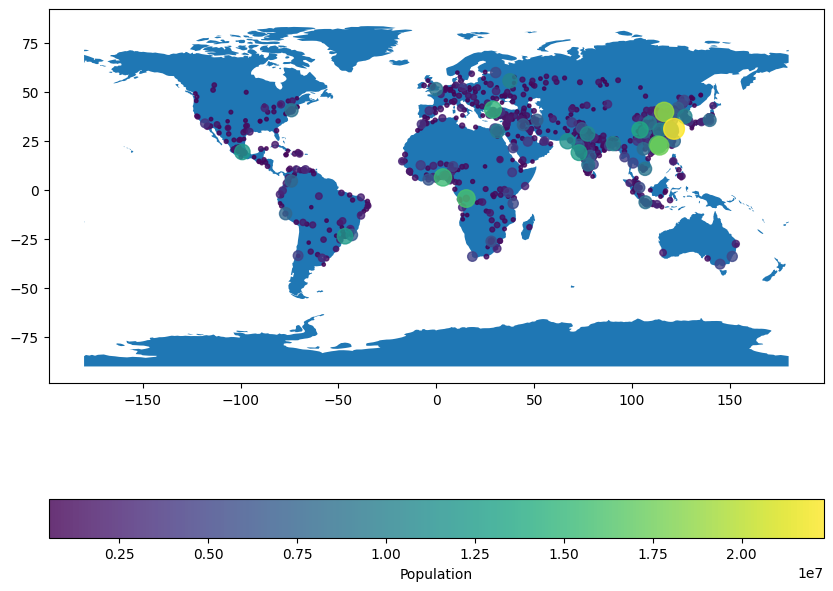

In [247]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

# get 1000 mosty populated places
df = myDf[-1000:]

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
# gdf.plot(ax=world.plot(figsize=(10, 10)), marker='o', c=df['Population'], markersize=3);

world.plot(figsize=(10, 10))
plt.scatter(x=df['Longitude'], y=df['Latitude'], c=df['Population'], s=df['Population']/100000, alpha=0.8)
plt.colorbar(label='Population', orientation= 'horizontal')


In [248]:
# get all data
df = myDf

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df['Population'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('betta0: %.2f' % model.intercept_)
print('betta1: %.2f' %model.coef_[0])
print('betta2: %.2f' %model.coef_[1])
print('model: ', f'population = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Latitude) + ({model.coef_[1]:.2f} * Longitude)')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R^2: %.2f' % r2_score(y_test, y_pred))


betta0: 37881.10
betta1: -326.51
betta2: 195.44
model:  population = 37881.10 + (-326.51 * Latitude) + (195.44 * Longitude)
Mean squared error: 73892123022.93
R^2: 0.01


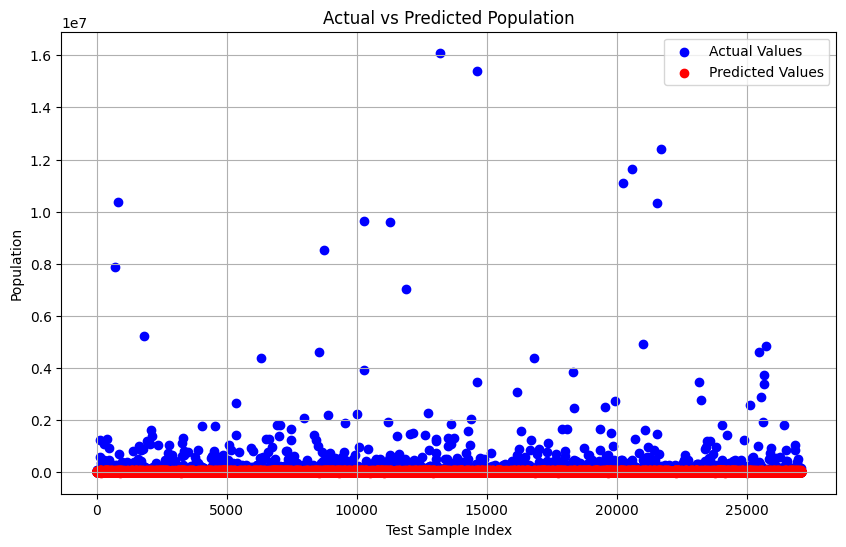

In [249]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Population')
plt.title('Actual vs Predicted Population')
plt.legend()
plt.grid(True)
plt.show()

In [250]:
# get 1000 moost populated places
df = myDf[:1000]

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df['Population'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('betta0: %.2f' % model.intercept_)
print('betta1: %.2f' %model.coef_[0])
print('betta2: %.2f' %model.coef_[1])
print('model: ', f'population = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Latitude) + ({model.coef_[1]:.2f} * Longitude)')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R^2: %.2f' % r2_score(y_test, y_pred))

betta0: 44.40
betta1: 0.11
betta2: -0.15
model:  population = 44.40 + (0.11 * Latitude) + (-0.15 * Longitude)
Mean squared error: 408.05
R^2: 0.03


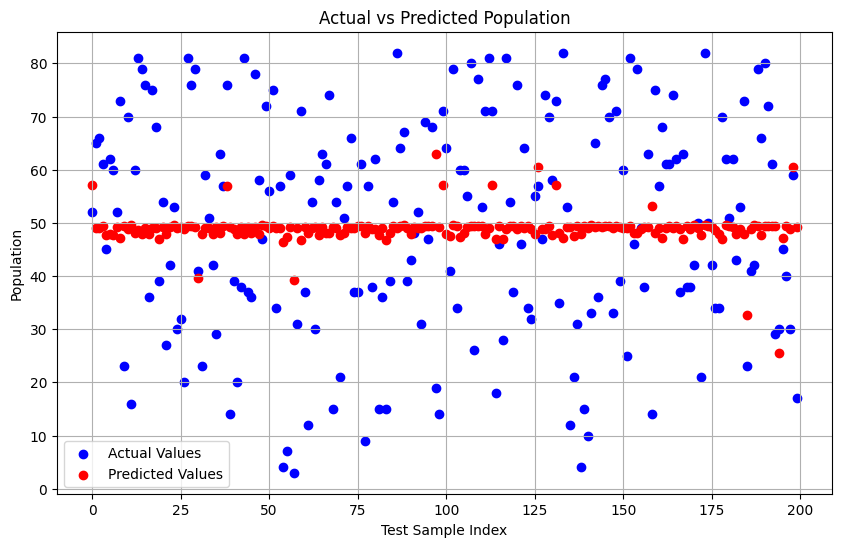

In [251]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Population')
plt.title('Actual vs Predicted Population')
plt.legend()
plt.grid(True)
plt.show()

In [252]:
# get 1000 middle places

df = myDf.iloc[len(myDf) // 2 - 500 : len(myDf) // 2 + 500]

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df['Population'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('betta0: %.2f' % model.intercept_)
print('betta1: %.2f' %model.coef_[0])
print('betta2: %.2f' %model.coef_[1])
print('model: ', f'population = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Latitude) + ({model.coef_[1]:.2f} * Longitude)')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R^2: %.2f' % r2_score(y_test, y_pred))

betta0: 3482.48
betta1: -0.06
betta2: -0.01
model:  population = 3482.48 + (-0.06 * Latitude) + (-0.01 * Longitude)
Mean squared error: 712.25
R^2: -0.01


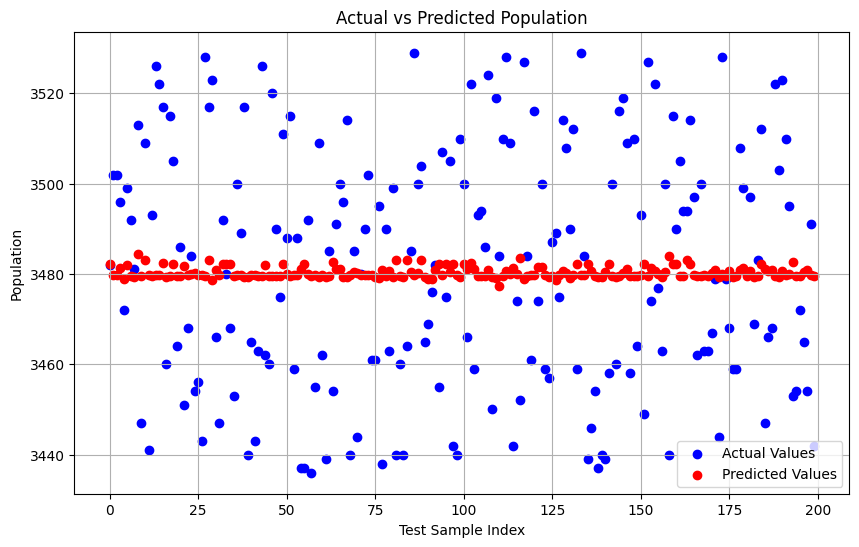

In [253]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Population')
plt.title('Actual vs Predicted Population')
plt.legend()
plt.grid(True)
plt.show()